In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math
from sklearn.metrics import mean_squared_error, r2_score

def __get_torque(token):
    name = token[1:]
    sign_index = name.find("-")
    if sign_index == 0:
        return [name[:2], name[2:]]
    return [name[:1], name[1:]]

In [110]:
DIRECTORY = "Record_Data\T2"
crop_num = 30

folders = []
for name in os.listdir(DIRECTORY):
    if name[0] == "X": folders.append(name)

columns_summary = ["X", "Y", "T1", "T2", "ideal_Fx", "measured_Fx_mean","measured_Fx_std", 
           "ideal_Fy", "measured_Fy_mean", "measured_Fy_std"]
df_summary = pd.DataFrame(columns=columns_summary)

for folder in folders:
    folder_directory = os.path.join(DIRECTORY, folder)
    x_label = int(folder[1:])
    files = os.listdir(folder_directory)

    for file in files:
        file_directory = os.path.join(folder_directory, file)
        file_name_tokens = file.split("_")
        y_label = int(file_name_tokens[0][1:])
        T1_label, T2_label = __get_torque(file_name_tokens[1])
        file_df = pd.read_csv(file_directory)[crop_num//2:-crop_num//2]
        ideal_Fx_label = file_df["Fx"].mean()
        measured_Fx_mean_label = file_df["Fy_Mea"].mean()
        measured_Fx_std_label = file_df["Fy_Mea"].std()

        ideal_Fy_label = file_df["Fy"].mean()
        measured_Fy_mean_label = -file_df["Fx_Mea"].mean()
        measured_Fy_std_label = file_df["Fx_Mea"].std()
        
        new_row_summary = {"X": x_label, "Y": y_label, "T1": T1_label, "T2": T2_label,
        "ideal_Fx": ideal_Fx_label, "measured_Fx_mean": measured_Fx_mean_label,
        "measured_Fx_std": measured_Fx_std_label, "ideal_Fy": ideal_Fy_label, 
        "measured_Fy_mean": measured_Fy_mean_label, 
        "measured_Fy_std": measured_Fy_std_label}

        df_summary = pd.concat([df_summary, pd.DataFrame([new_row_summary])], ignore_index=True)

df_summary

,X,Y,T1,T2,ideal_Fx,measured_Fx_mean,measured_Fx_std,ideal_Fy,measured_Fy_mean,measured_Fy_std
0,25,100,-2,-2,-2.916476,-4.265434,0.02489,14.677546,17.627434,0.069307
1,25,100,-2,0,-5.876429,-7.79399,0.045274,5.506686,6.736852,0.033419
2,25,100,0,-2,2.579734,3.007058,0.025981,9.175742,12.148094,0.070877
3,25,100,0,2,-2.423321,-3.914308,0.02155,-8.859403,-9.802207,0.047305
4,25,100,2,0,6.064359,7.284407,0.030234,-5.53757,-5.354498,0.029348
...,...,...,...,...,...,...,...,...,...,...
247,40,190,-2,0,-8.408124,-9.904797,0.033426,1.056407,1.035348,0.010761
248,40,190,0,-2,5.487573,8.24332,0.035663,7.589941,10.945996,0.062632
249,40,190,0,2,-5.806382,-3.879755,0.122877,-7.864052,-8.32741,0.173024
250,40,190,2,0,8.248863,11.496119,0.0649,-0.886012,-1.310307,0.014272


Text(0.5, 0, 'Recording Sessions (Shared)')

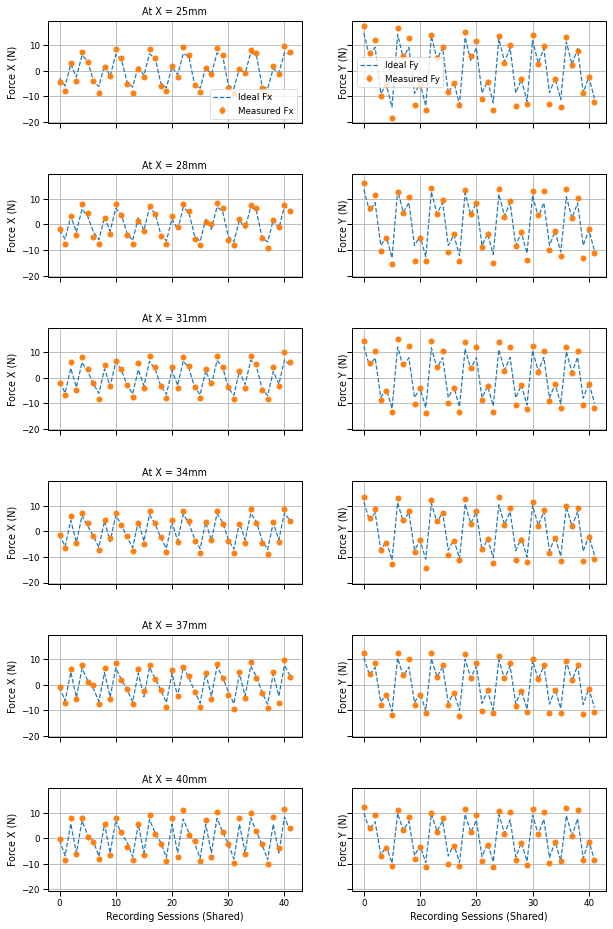

In [112]:
ncols = 2

x_positions = df_summary["X"].unique()
nrows = len(x_positions)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 16), sharex='col', sharey=True,
                         gridspec_kw={'hspace': 0.5})

for i in range(len(x_positions)):
    position = x_positions[i]
    filtered_df = df_summary[df_summary["X"] == position]

    axes[i, 0].plot(range(filtered_df.shape[0]), filtered_df["ideal_Fx"], linestyle="--", label="Ideal Fx") 
    axes[i, 0].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fx_mean"], yerr=filtered_df["measured_Fx_std"], fmt="o", markersize=5,label="Measured Fx")
    # axes[i, 0].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fx_mean"], yerr=filtered_df["measured_Fx_std"])
    axes[i, 0].grid(True)
    axes[i, 0].set_ylabel(f'Force X (N)')

    axes[i, 1].plot(range(filtered_df.shape[0]), filtered_df["ideal_Fy"], linestyle="--", label="Ideal Fy")
    axes[i, 1].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fy_mean"], yerr=filtered_df["measured_Fy_std"], fmt="o", markersize=5, label="Measured Fy")
    # axes[i, 1].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fy_mean"], yerr=filtered_df["measured_Fy_std"])
    axes[i, 1].grid(True)
    axes[i, 1].set_ylabel(f'Force Y (N)')
    
    axes[i, 0].set_title(f"At X = {x_positions[i]}mm")

axes[0,0].legend(loc='best')
axes[0,1].legend(loc='best')
axes[nrows-1, 0].set_xlabel('Recording Sessions (Shared)')
axes[nrows-1, 1].set_xlabel('Recording Sessions (Shared)')



In [113]:
columns_all = ["X", "Y", "Fx", "Fy", "type"]
df_all = pd.DataFrame(columns=columns_all)

for folder in folders:
    folder_directory = os.path.join(DIRECTORY, folder)
    x_label = int(folder[1:])
    files = os.listdir(folder_directory)

    for file in files:
        file_directory = os.path.join(folder_directory, file)
        file_df = pd.read_csv(file_directory)[crop_num//2:-crop_num//2]
        file_name_tokens = file.split("_")
        y_label = int(file_name_tokens[0][1:])
        
        num_row = file_df.shape[0]

        new_df = {"X": [int(x_label) for i in range(2*num_row)], "Y": [y_label for i in range(2*num_row)],
                  "Fx": file_df[["Fx", "Fy_Mea"]].to_numpy().transpose().flatten(), 
                  "Fy": np.append(file_df["Fy"],-file_df["Fx_Mea"]).tolist(),
                  "type": ["Ideal" if i < num_row else "Measured" for i in range(2*num_row)]}
        new_df = pd.DataFrame(new_df)

        df_all = pd.concat([df_all, new_df], ignore_index=True)
        

df_all[["Fx", "Fy"]] = df_all[["Fx", "Fy"]].astype(int)
df_all

,X,Y,Fx,Fy,type
0,25,100,-2,14,Ideal
1,25,100,-2,14,Ideal
2,25,100,-2,14,Ideal
3,25,100,-2,14,Ideal
4,25,100,-2,14,Ideal
...,...,...,...,...,...
146471,40,190,3,-8,Measured
146472,40,190,3,-8,Measured
146473,40,190,3,-8,Measured
146474,40,190,3,-8,Measured


Text(0.5, 0, 'Y position (mm)')

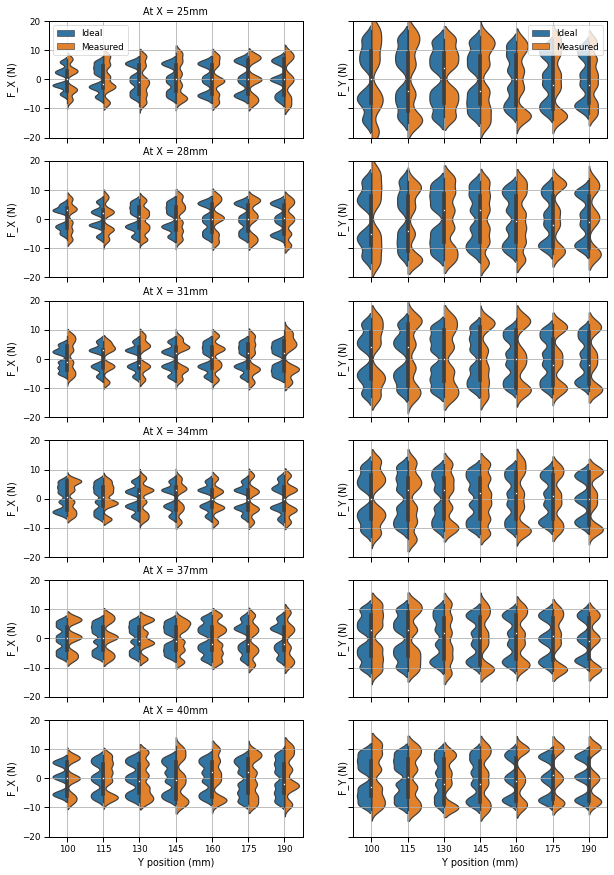

In [114]:
sns.set_context("paper")

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15), sharex='col', sharey=True,)

for i in range(len(x_positions)):
    position = x_positions[i]
    filtered_df = df_all[df_all["X"] == position]
    
    ax1 = sns.violinplot(x="Y", y="Fx", data=filtered_df, hue="type", split=True, ax=axes[i,0])
    ax2.set_ylim(-20, 20)
    ax1.legend().remove()
    ax1.set_ylabel(f'F_X (N)')
    ax1.set_xlabel('')
    ax1.grid(True)

    ax2 = sns.violinplot(x="Y", y="Fy", data=filtered_df, hue="type", split=True, ax=axes[i,1])
    ax2.set_ylim(-20, 20)
    ax2.legend().remove()
    ax2.set_ylabel(f'F_Y (N)')
    ax2.set_xlabel('')
    ax2.grid(True)

    axes[i, 0].set_title(f"At X = {x_positions[i]}mm")

axes[0,0].legend(loc='best')
axes[0,1].legend(loc='best')
axes[nrows-1, 0].set_xlabel('Y position (mm)')
axes[nrows-1, 1].set_xlabel('Y position (mm)')


In [115]:
def smape(actual, predicted, epsilon=1e-10):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted) + epsilon))

actual_values_x = df_all[df_all["type"] == "Measured"]["Fx"]
predicted_values_x = df_all[df_all["type"] == "Ideal"]["Fx"]

rmse_value_x = np.sqrt(mean_squared_error(actual_values_x, predicted_values_x))
r2_x = r2_score(actual_values_x, predicted_values_x)
smape_value_x = smape(actual_values_x, predicted_values_x)

actual_values_y = df_all[df_all["type"] == "Measured"]["Fy"]
predicted_values_y = df_all[df_all["type"] == "Ideal"]["Fy"]

rmse_value_y = np.sqrt(mean_squared_error(actual_values_y, predicted_values_y))
r2_y = r2_score(actual_values_y, predicted_values_y)
smape_value_y = smape(actual_values_y, predicted_values_y)

print(f"Root Mean Squared Error (RMSE) for Fx: {rmse_value_x}")
print(f"R-squared for Fx: {r2_x}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE) for Fx: {smape_value_x}")
print(f"Root Mean Squared Error (RMSE) for Fy: {rmse_value_y}")
print(f"R-squared for Fy: {r2_y}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE) for Fy: {smape_value_y}")

Root Mean Squared Error (RMSE) for Fx: 1.333584772891021
R-squared for Fx: 0.9411205601453507
Symmetric Mean Absolute Percentage Error (SMAPE) for Fx: nan
Root Mean Squared Error (RMSE) for Fy: 1.917906069384028
R-squared for Fy: 0.95599801055828
Symmetric Mean Absolute Percentage Error (SMAPE) for Fy: nan
